# Credit Card Fraud Detection

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Download and unzip the dataset**
   * **Split the dataset**
   
### [3. Exploratory Analysis](#explore)

### [4. Model Architecture](#cnn)
   * **Set hyperparameters**
   * **Define the model**
   * **Set optimizer** 
   * **Compile model**
   * **Train model**

### [5. Model Evaluation](#eval)
   * **Training Accuracy vs Validation Accuracy**
   * **Training Loss vs Validation Loss**
   * **Model Accuracy**
   * **Observations**

### [6. Prediction](#predict)

### [7. Save Model to Disk](#save)
  

<a id="intro"></a>
### 1. Introduction

#### About the dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

#### Problem statement
Classify the transactions as **fraud (1)** and **legitimate (0)**.

#### Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud/

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

#### Download and unzip the dataset

In [2]:
df=pd.read_csv("creditcard.csv")

<a id="explore"></a>
### 3. Exploratory Analysis

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

The dataset has 31 features and 284807 samples

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

##### To check for any missing values

In [6]:
df.isnull().values.any()

False

In [7]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the above table, we can infer that time and amount features have high range of values as compared to other feartures. So these features are standardized around their mean using StandardScaler().

In [9]:
scale=StandardScaler()
df[['Amount','Time']]=scale.fit_transform(np.array(df[['Amount','Time']]))

The standardized data of all the features can be visualized below:

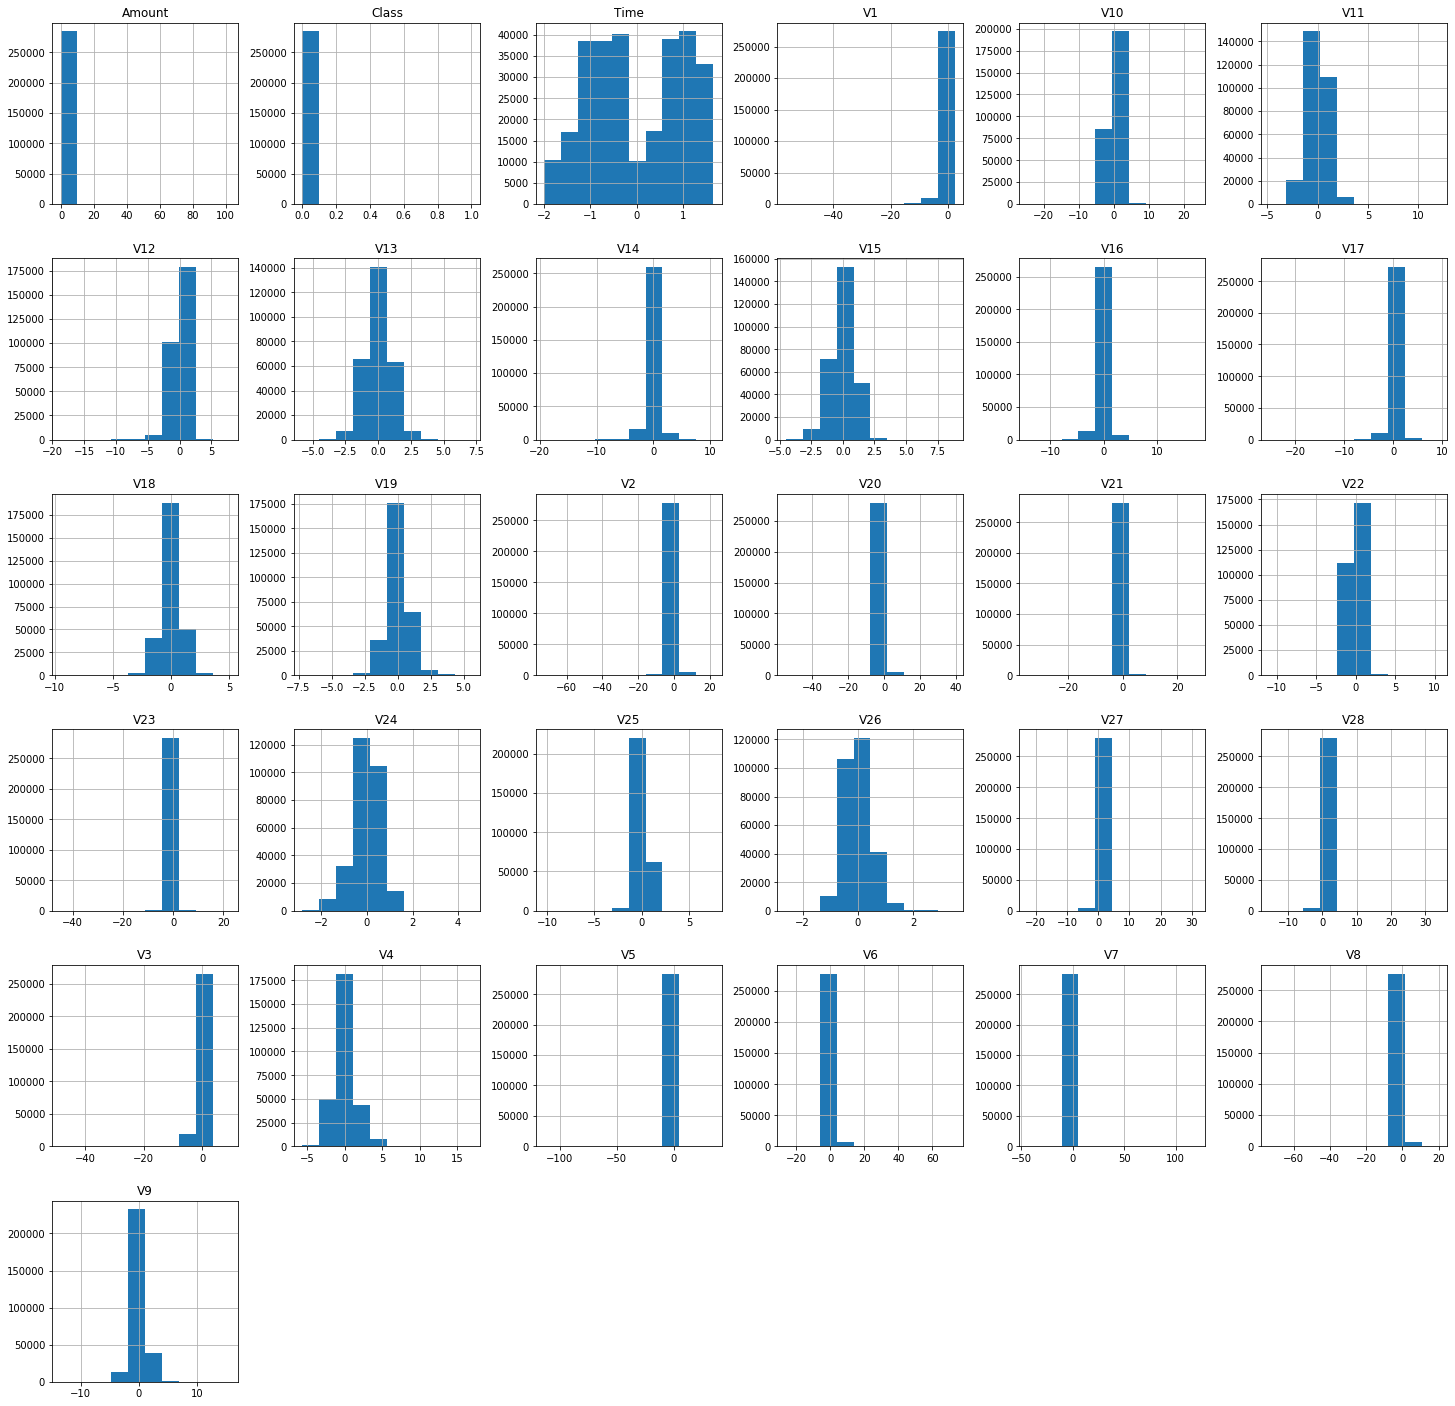

In [10]:
df.hist(figsize=(25,25))
plt.show()

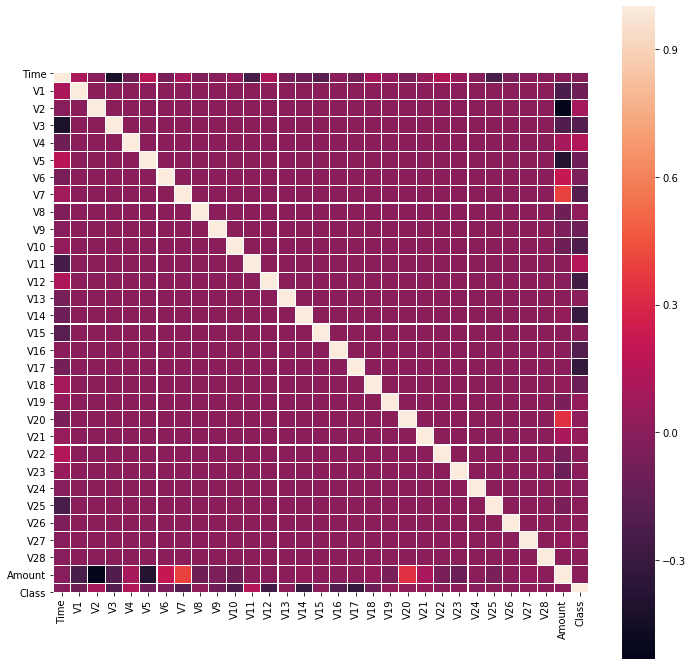

In [11]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corrmat,vmax=1.0,square=True,linewidths=0.1)
plt.show()

In [12]:
col=df.columns.tolist()

In [13]:
x=df.drop(columns='Class') #input featuures
y=df['Class']  #target or output feature

#### Split the dataset

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)
print('xtrain: {0}, ytrain: {1}'.format(xtrain.shape,ytrain.shape))
print('xtest: {0}, ytest: {1}'.format(xtest.shape,ytest.shape))

xtrain: (199364, 30), ytrain: (199364,)
xtest: (85443, 30), ytest: (85443,)


In [15]:
fraud=(ytrain==1).sum()
valid=(ytrain==0).sum()
print('No. of fraud cases:',fraud)
print('No. of valid cases:',valid)

No. of fraud cases: 344
No. of valid cases: 199020


This dataset is highly imbalanced as the classes are biased. This is solved by applying SMOTE oversampling technique to balance the classes. 

In [16]:
resample=SMOTE(random_state=5)
x_train,y_train=resample.fit_sample(xtrain,ytrain)

In [17]:
print(x_train.shape,y_train.shape)

(398040, 30) (398040,)


In [18]:
re_fraud=(y_train==1).sum()
re_valid=(y_train==0).sum()
print('No. of fraud cases after resampling:',re_fraud)
print('No. of valid cases after resampling:',re_valid)

No. of fraud cases after resampling: 199020
No. of valid cases after resampling: 199020


Now there are equal number of fraud(1) and valid(0) classes in the dataset

<a id="cnn"></a>
### 4. Model Architecture

In [19]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from mlxtend.plotting import plot_confusion_matrix

Using TensorFlow backend.


#### Set hyperparameters

In [20]:
epoch=10
act_func='relu'
lr=0.0001
dropout_rate=0.5
batchsize=32
loss_func='binary_crossentropy'

#### Define the model

In [21]:
model=Sequential()
model.add(Dense(60,input_shape=(30,),activation=act_func))
model.add(Dropout(0.5,seed=0))
model.add(Dense(35,activation=act_func))
model.add(Dropout(0.5,seed=0))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1860      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 35)                2135      
_________________________________________________________________
dropout_2 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 4,031
Trainable params: 4,031
Non-trainable params: 0
_________________________________________________________________


#### Set optimizer 

In [23]:
opt=Adam(learning_rate=lr)

#### Compile model

In [24]:
model.compile(optimizer=opt, loss=loss_func, metrics=['accuracy'] )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Train model

In [25]:
history=model.fit(x_train, y_train, batch_size=batchsize, epochs=epoch, validation_split=0.2, shuffle=True)

Train on 318432 samples, validate on 79608 samples
Epoch 1/10
318432/318432 [==============================] - 27s 83us/step - loss: 0.1737 - accuracy: 0.9342 - val_loss: 0.1216 - val_accuracy: 0.9387
Epoch 2/10
318432/318432 [==============================] - 29s 90us/step - loss: 0.0752 - accuracy: 0.9704 - val_loss: 0.0666 - val_accuracy: 0.9784
Epoch 3/10
318432/318432 [==============================] - 29s 90us/step - loss: 0.0518 - accuracy: 0.9811 - val_loss: 0.0387 - val_accuracy: 0.9913
Epoch 4/10
318432/318432 [==============================] - 27s 83us/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0217 - val_accuracy: 0.9975
Epoch 5/10
318432/318432 [==============================] - 26s 83us/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0160 - val_accuracy: 0.9987
Epoch 6/10
318432/318432 [==============================] - 26s 82us/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0116 - val_accuracy: 0.9995
Epoch 7/10
318432/318432 [=======================

<a id="eval"></a>
### 5. Model Evaluation

In [26]:
print(history.history.keys()) 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


#### Training Accuracy vs Validation Accuracy

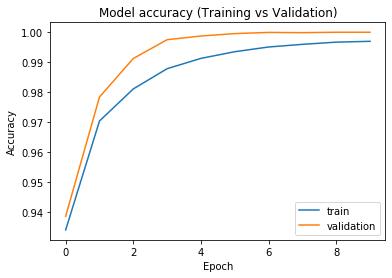

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy (Training vs Validation)')
plt.legend(['train', 'validation'],loc='lower right')
plt.show()

#### Training Loss vs Validation Loss

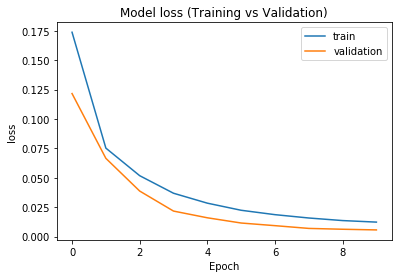

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model loss (Training vs Validation)')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

#### Model Accuracy

In [29]:
loss, acc=model.evaluate(xtest,ytest,batch_size=batchsize)

85443/85443 [==============================] - 2s 28us/step


In [30]:
print('Loss: ',loss)
print('Accuracy: ',acc)

Loss:  0.026536843345738356
Accuracy:  0.9983732104301453


#### Observations:
In the model accuracy and model loss plots of the trained data, we can see that the model is optimized with a validation accuracy of 100% and a minimal loss of 0.0057.
Also the test accuracy is 99.8% with a loss of 0.026. 

<a id="predict"></a>
### 6. Prediction

<Figure size 432x288 with 0 Axes>

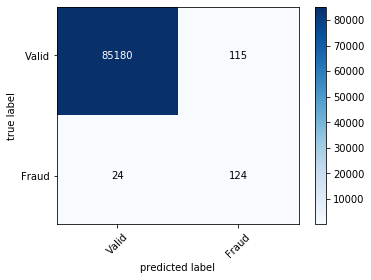

In [31]:
ypred=model.predict_classes(xtest)
label=['valid','fraud']
con_mat=confusion_matrix(ytest,ypred)
plt.figure()
cm=plot_confusion_matrix(con_mat, class_names=['Valid','Fraud'],colorbar=True)
ax = plt.gca()
ax.set_ylim([1.4,-0.4])
plt.show()

From the confusion matrix, we can see that the model has predicted 85180 valid cases and 124 fraud cases correctly. The number of false predictions are very small. 

<a id="save"></a>
### 7. Save Model to Disk

In [34]:
model.save('Fraud_detection.h5')